#Start

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


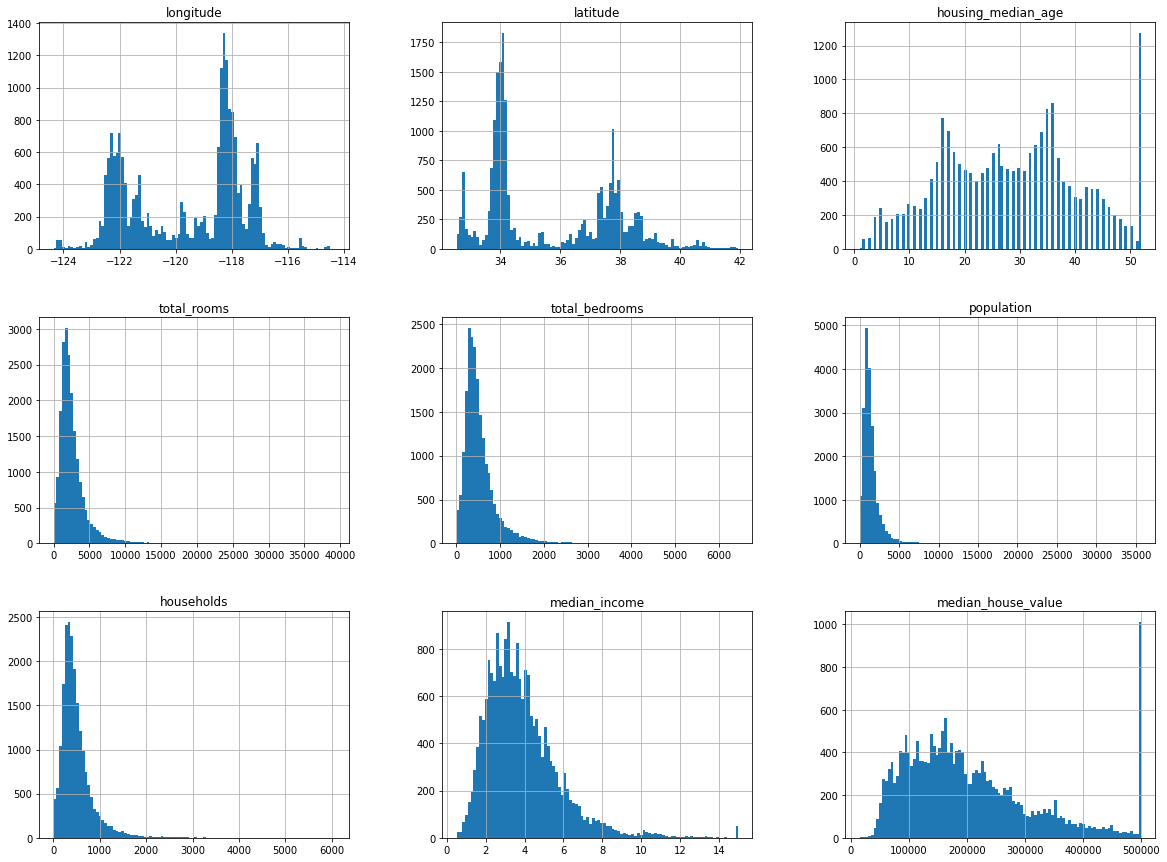

In [ ]:
#sns.pairplot(housing)
housing.hist(bins=100 ,figsize=(20,15))
plt.show()


The housing median age and the median house value were also capped. The latter may be a serious problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn that prices never go beyond that limit. You need to check with your client team (the team that will use your system’s out‐ put) to see if this is a problem or not. If they tell you that they need precise pre‐ dictions even beyond $500,000, then you have mainly two options:

**a. Collect proper labels for the districts whose labels were capped.**

**b. Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $500,000).**

These attributes have very different scales. We will discuss this later in this chap‐ ter when we explore feature scaling.

**Finally, many histograms are tail heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later to have more bell-shaped distributions.**

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2,random_state=42)

**This is called stratified sampling: the population is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population.**

In [ ]:
housing["income_cat"] = pd.cut(housing['median_income'],
                               bins=[0,1,3,4,6,np.inf],
                               labels = [1,2,3,4,5])

<Axes: >

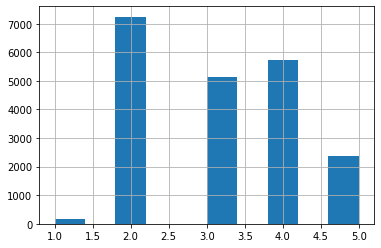

In [ ]:
housing["income_cat"].hist()

## Stratified Sampling

**Now we are ready to do stratified sampling based on the income category. For this you can use Scikit-Learn’s StratifiedShuffleSplit class**

Stratified sampling is a sampling technique used in machine learning and statistics to select representative samples from a population. In stratified sampling, the population is divided into subgroups, or strata, based on some characteristic, and samples are drawn from each stratum in proportion to the size or importance of the stratum.

In machine learning, stratified sampling is commonly used to ensure that the training, validation, and testing sets have similar distributions of target variables. For example, if a dataset has a target variable that is binary (e.g., 0 or 1), stratified sampling can ensure that the training, validation, and testing sets have approximately the same proportion of 0s and 1s as the original dataset.

Stratified sampling is a useful technique for improving the accuracy and reliability of machine learning models, especially when the dataset is imbalanced, i.e., when the distribution of the target variable is skewed towards one class.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2 , random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [ ]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

2    0.351017
4    0.277374
3    0.249516
5    0.114341
1    0.007752
Name: income_cat, dtype: float64

Now we should remove the income_cat attribute so the data is back to its original state:

In [ ]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat',axis=1,inplace = True)

Let’s create a copy so you can play with it without harming the training set:

In [ ]:
housing = strat_train_set.copy()

## Visualizing Geographical Data

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='longitude', ylabel='latitude'>

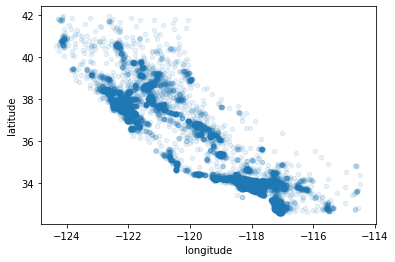

In [ ]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

<function matplotlib.pyplot.legend(*args, **kwargs)>

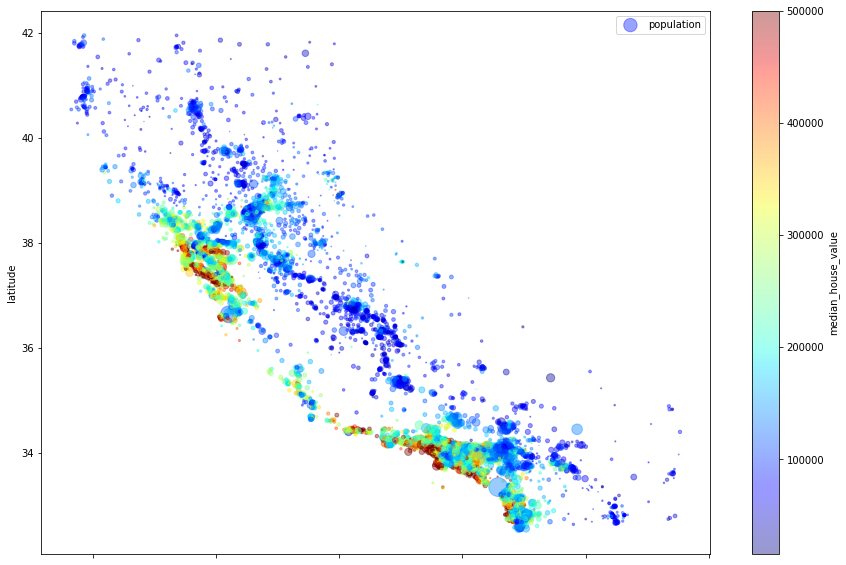

In [ ]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
             s=housing['population']/100, label = 'population', figsize= (15,10),
             c='median_house_value', cmap = plt.get_cmap('jet'),colorbar=True,)
plt.legend

## Correlations

Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the corr() method:

**The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). Finally, coefficients close to zero mean that there is no linear correlation.**

**The correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”). It may completely miss out on nonlinear relationships**

In [ ]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.692160
total_rooms           0.137212
housing_median_age    0.104823
households            0.066463
total_bedrooms        0.050837
population           -0.022208
longitude            -0.044134
latitude             -0.147017
Name: median_house_value, dtype: float64

**Another way to check for correlation between attributes is to use Pandas’ scatter_matrix function, which plots every numerical attribute against every other numerical attribute.**

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

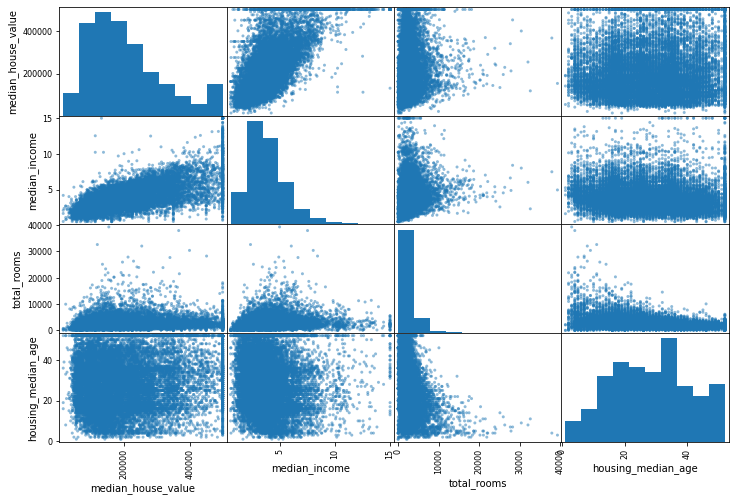

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value','median_income', 'total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='median_income', ylabel='median_house_value'>

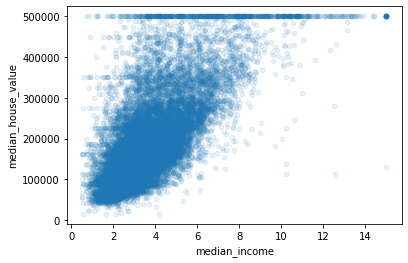

In [ ]:
housing.plot(kind='scatter',x='median_income',y= 'median_house_value',alpha=0.1)

In [ ]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13525,-117.29,34.17,35.0,4174.0,847.0,2127.0,778.0,3.2232,88300.0,INLAND
542,-122.29,37.76,18.0,2873.0,763.0,1243.0,663.0,5.1702,265400.0,NEAR BAY
155,-122.23,37.81,52.0,2315.0,292.0,861.0,258.0,8.8793,410300.0,NEAR BAY
13324,-117.64,34.06,50.0,637.0,143.0,590.0,147.0,1.9659,85700.0,INLAND
6413,-118.03,34.11,34.0,2837.0,460.0,1344.0,458.0,6.5722,437400.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
3086,-118.59,35.72,28.0,1491.0,408.0,98.0,48.0,1.4205,90000.0,INLAND
7789,-118.07,33.89,29.0,1138.0,217.0,964.0,222.0,4.5370,185300.0,<1H OCEAN
1747,-122.36,37.96,30.0,950.0,317.0,1073.0,280.0,1.8664,107800.0,NEAR BAY
12540,-121.50,38.55,52.0,2784.0,455.0,957.0,448.0,5.6402,209800.0,INLAND


In [ ]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13525,-117.29,34.17,35.0,4174.0,847.0,2127.0,778.0,3.2232,88300.0,INLAND
542,-122.29,37.76,18.0,2873.0,763.0,1243.0,663.0,5.1702,265400.0,NEAR BAY
155,-122.23,37.81,52.0,2315.0,292.0,861.0,258.0,8.8793,410300.0,NEAR BAY
13324,-117.64,34.06,50.0,637.0,143.0,590.0,147.0,1.9659,85700.0,INLAND
6413,-118.03,34.11,34.0,2837.0,460.0,1344.0,458.0,6.5722,437400.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
3086,-118.59,35.72,28.0,1491.0,408.0,98.0,48.0,1.4205,90000.0,INLAND
7789,-118.07,33.89,29.0,1138.0,217.0,964.0,222.0,4.5370,185300.0,<1H OCEAN
1747,-122.36,37.96,30.0,950.0,317.0,1073.0,280.0,1.8664,107800.0,NEAR BAY
12540,-121.50,38.55,52.0,2784.0,455.0,957.0,448.0,5.6402,209800.0,INLAND


In [ ]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedroons_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [ ]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.692160
rooms_per_household         0.148583
total_rooms                 0.137212
housing_median_age          0.104823
households                  0.066463
total_bedrooms              0.050837
population_per_household   -0.021872
population                 -0.022208
longitude                  -0.044134
latitude                   -0.147017
bedroons_per_room          -0.267488
Name: median_house_value, dtype: float64

In [ ]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

## Data Cleaning

In [ ]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        154
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

**Scikit-Learn provides a handy class to take care of missing values: SimpleImputer. Here is how to use it. First, you need to create a SimpleImputer instance, specifying that you want to replace each attribute’s missing values with the median of that attribute**

### First Method

In [ ]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median,inplace = True)

In [ ]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

### Second Method

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

#Since the median can only be computed on numerical attributes, 
#we need to create a copy of the data without the text attribute ocean_proximity

housing_num = housing.drop('ocean_proximity',axis=1)

imputer.fit(housing_num)

#The imputer has simply computed the median of each attribute and stored the result in 
#its statistics_ instance variable. Only the total_bedrooms attribute had missing values, 
#but we cannot be sure that there won’t be any missing values in new data after the system 
#goes live, so it is safer to apply the imputer to all the numerical attributes


SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2122.     ,  433.     ,
       1162.5    ,  408.     ,    3.54355])

In [ ]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2122.     ,  433.     ,
       1162.5    ,  408.     ,    3.54355])

Now you can use this “trained” imputer to transform the training set by replacing missing values by the learned medians

In [ ]:
x = imputer.transform(housing_num)

The result is a plain NumPy array containing the transformed features. If you want to
put it back into a Pandas DataFrame, it’s simple:

In [ ]:
housing_tr = pd.DataFrame(x,columns = housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.29,34.17,35.0,4174.0,847.0,2127.0,778.0,3.2232
1,-122.29,37.76,18.0,2873.0,763.0,1243.0,663.0,5.1702
2,-122.23,37.81,52.0,2315.0,292.0,861.0,258.0,8.8793
3,-117.64,34.06,50.0,637.0,143.0,590.0,147.0,1.9659
4,-118.03,34.11,34.0,2837.0,460.0,1344.0,458.0,6.5722
...,...,...,...,...,...,...,...,...
16507,-118.59,35.72,28.0,1491.0,408.0,98.0,48.0,1.4205
16508,-118.07,33.89,29.0,1138.0,217.0,964.0,222.0,4.5370
16509,-122.36,37.96,30.0,950.0,317.0,1073.0,280.0,1.8664
16510,-121.50,38.55,52.0,2784.0,455.0,957.0,448.0,5.6402


## Encoder (Handling text and Categorical Attributes)

In [ ]:
housing_cat = housing[['ocean_proximity']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [3.],
       [3.],
       [1.],
       [1.],
       [3.],
       [1.],
       [0.],
       [1.],
       [0.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### OneHotEncoder

**One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold)**

In [ ]:
cat_encoder = OneHotEncoder()
housing_cat_1hot= cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

**Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories. After one- hot encoding we get a matrix with thousands of columns, and the matrix is full of zeros except for a single 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the non zero elements.**

In [ ]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

## Transformation

In [ ]:
# Write transformation from Scratch without using Scikit Learn Functions
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room 
  def fit(self, X, y=None):
    return self # nothing else to do 
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix] 
    population_per_household = X[:, population_ix] / X[:, households_ix] 
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household,
                  bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Feature Scaling

**With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the hous‐ ing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally not required.
There are two common ways to get all attributes to have the same scale: min-max scaling (many people call this normalization) and standardization** 

**Standardization is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algo‐ rithms (e.g., neural networks often expect an input value ranging from 0 to 1). How‐ ever, standardization is much less affected by outliers.**

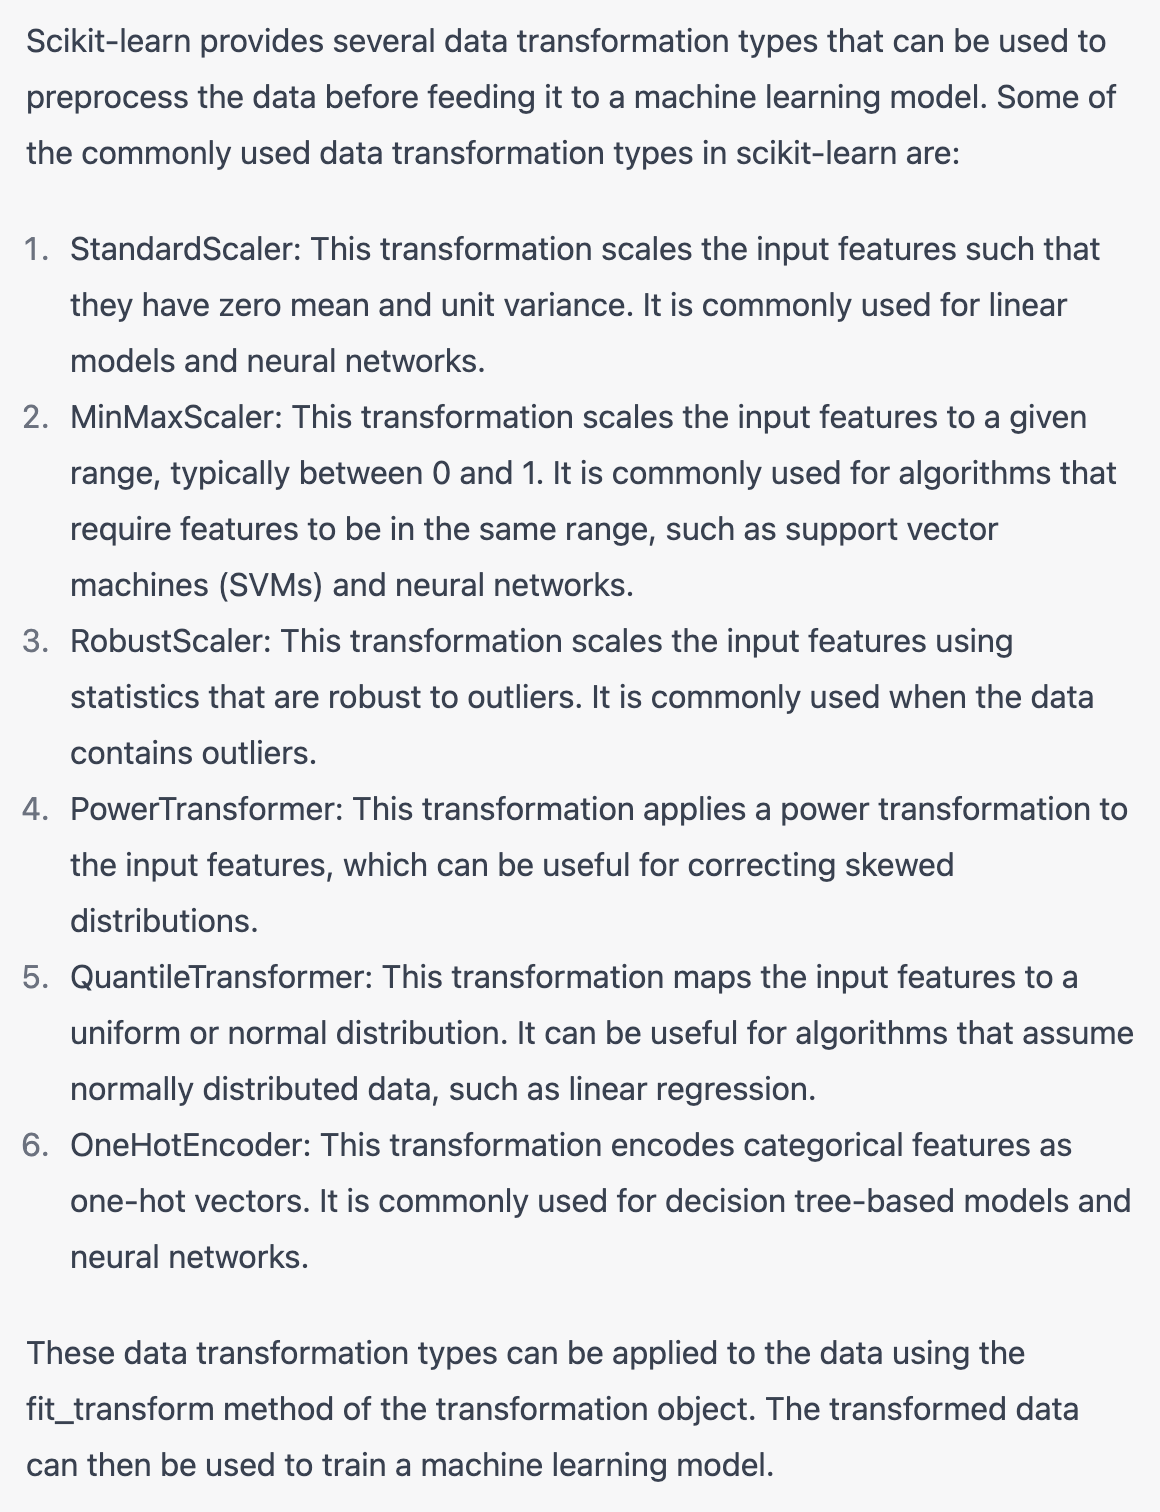

### Transformation Pipeline


In machine learning, a transformation pipeline is a sequence of data processing steps that are applied to a dataset to transform it into a format that is suitable for training a machine learning model. The goal of a transformation pipeline is to prepare the data for use in a machine learning algorithm by converting it into a format that can be easily interpreted by the algorithm.

A typical transformation pipeline includes several steps, such as data cleaning, data preprocessing, feature engineering, and feature scaling. Each step in the pipeline applies a specific transformation to the data to make it more useful for the machine learning algorithm.

For example, data cleaning might involve removing missing values or outliers from the dataset, while data preprocessing might involve scaling the data to a common range or converting categorical variables into numerical values. Feature engineering might involve creating new features from existing ones or transforming existing features in some way, while feature scaling might involve standardizing the scale of the features to make them comparable.

Once the transformation pipeline has been applied to the data, it is ready to be used to train a machine learning model. The pipeline can also be applied to new data that the model has not seen before, in order to transform it into the same format as the training data and make predictions on it.

**As you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with such sequences of transformations. Here is a small pipeline for the numerical attributes:**

#### Sample of Transformation Pipeline by ChatGPT



In [ ]:
'''
# Import libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Define pipeline steps for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define pipeline steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define column transformer to apply numeric and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['age', 'income']),
        ('cat', categorical_transformer, ['gender', 'occupation', 'education'])
    ])

# Define feature selection
feature_selector = SelectKBest(f_classif, k=5)

# Define classifier
classifier = RandomForestClassifier()

# Define transformation pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('feature_selector', feature_selector),
                           ('classifier', classifier)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)
'''

"\n# Import libraries\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.preprocessing import OneHotEncoder, StandardScaler\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.feature_selection import SelectKBest, f_classif\nfrom sklearn.ensemble import RandomForestClassifier\n\n# Define pipeline steps for numeric features\nnumeric_transformer = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='median')),\n    ('scaler', StandardScaler())\n])\n\n# Define pipeline steps for categorical features\ncategorical_transformer = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),\n    ('onehot', OneHotEncoder(handle_unknown='ignore'))\n])\n\n# Define column transformer to apply numeric and categorical transformations\npreprocessor = ColumnTransformer(\n    transformers=[\n        ('num', numeric_transformer, ['age', 'income']),\n        ('cat', categorical_transformer, ['gender', 'occupation', 

In the above example, the transformation pipeline includes the following steps:


1.   Numeric feature transformation using SimpleImputer to fill missing values with the median and StandardScaler to scale the features.
2.   Categorical feature transformation using SimpleImputer to fill missing values with "missing" and OneHotEncoder to encode the categorical features.
3. ColumnTransformer to apply the numeric and categorical transformations to the appropriate columns.
4. Feature selection using SelectKBest with the f_classif score function to select the top 5 features.
5. Feature selection using SelectKBest with the f_classif score function to select the top 5 features.

6. Classification using RandomForestClassifier.

The entire pipeline is fit on the training data and used to make predictions on the test data.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipeline = Pipeline ([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
from sklearn.compose import ColumnTransformer 

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
             ("num", num_pipeline, num_attribs),
             ("cat", OneHotEncoder(), cat_attribs),
         ])
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
print(housing.shape)
print(housing_prepared.shape)

(16512, 9)
(16512, 16)


In [ ]:
print(pd.DataFrame(housing_prepared))

             0         1         2         3         4         5         6   \
0      1.139897 -0.688908  0.510711  0.704603  0.735268  0.620540  0.727551   
1     -1.350201  0.986014 -0.843697  0.109045  0.536386 -0.156715  0.428264   
2     -1.320320  1.009341  1.865120 -0.146391 -0.578775 -0.492588 -0.625744   
3      0.965590 -0.740229  1.705777 -0.914529 -0.931555 -0.730864 -0.914621   
4      0.771363 -0.716901  0.431040  0.092565 -0.181011 -0.067911 -0.105246   
...         ...       ...       ...       ...       ...       ...       ...   
16507  0.492472  0.034248 -0.046986 -0.523593 -0.304128 -1.163454 -1.172267   
16508  0.751442 -0.819542  0.032685 -0.685186 -0.756349 -0.402025 -0.719434   
16509 -1.385062  1.079324  0.112356 -0.771247 -0.519584 -0.306187 -0.568489   
16510 -0.956765  1.354590  1.865120  0.068303 -0.192849 -0.408180 -0.131271   
16511 -1.310359  0.804058  0.431040 -0.530460 -0.756349 -0.710641 -0.716831   

             7         8         9         10   11 

## Train Model

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(pd.DataFrame(housing_prepared).iloc[:,:13], housing_labels)

LinearRegression()

In [ ]:
print(housing_prepared.shape)

(16512, 16)


In [ ]:
some_data = housing.iloc[:5]
some_data_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [ ]:
print(some_data.shape)
print(some_data_labels.shape)
print(some_data_prepared.shape)

(5, 9)
(5,)
(5, 16)


In [ ]:
#print("prediction:" , lin_reg.predict(some_data_prepared))

In [ ]:
#Compute Errors 
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(pd.DataFrame(housing_prepared).iloc[:,:13])
lin_mse = mean_squared_error(housing_predictions, housing_labels)
print('Error =',np.sqrt(lin_mse))

Error = 68145.86271706891


### DecisionTree Regression

In [ ]:
# The Error is Toooo Much so we are going to test another model like DecisionTree Regressor 
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(pd.DataFrame(housing_prepared).iloc[:,:13], housing_labels)

DecisionTreeRegressor()

In [ ]:
housing_predictions = tree_reg.predict(pd.DataFrame(housing_prepared).iloc[:,:13])
lin_mse = mean_squared_error(housing_predictions, housing_labels)
print('Error =',np.sqrt(lin_mse))

Error = 0.0


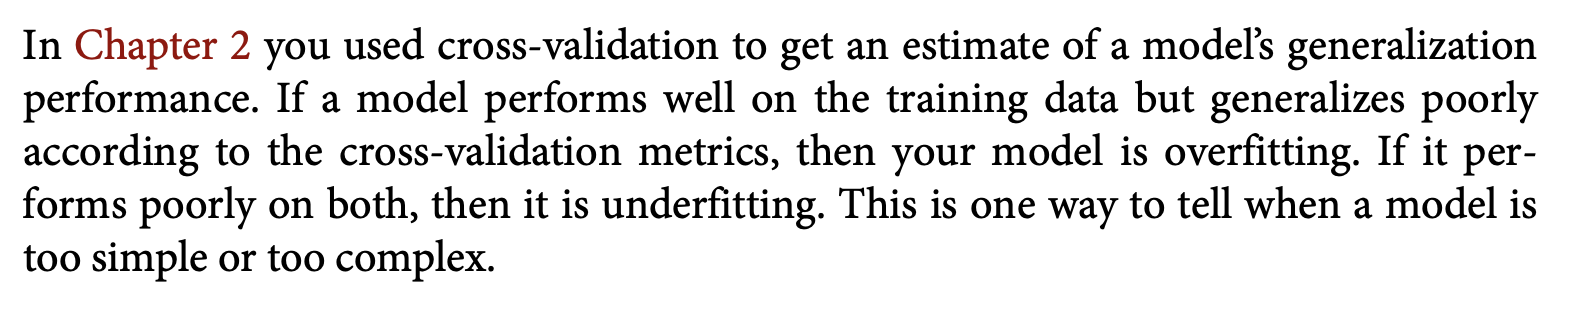

### K-fold Cross Validation

A great alternative is to use Scikit-Learn’s K-fold cross-validation feature. The follow‐ ing code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array con‐ taining the 10 evaluation scores:

In [ ]:
pd.DataFrame(housing_prepared)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.139897,-0.688908,0.510711,0.704603,0.735268,0.620540,0.727551,-0.340446,-0.029626,-0.031238,-0.163756,0.0,1.0,0.0,0.0,0.0
1,-1.350201,0.986014,-0.843697,0.109045,0.536386,-0.156715,0.428264,0.687433,-0.429517,-0.105388,0.784900,0.0,0.0,0.0,1.0,0.0
2,-1.320320,1.009341,1.865120,-0.146391,-0.578775,-0.492588,-0.625744,2.645577,1.368776,0.020830,-1.326445,0.0,0.0,0.0,1.0,0.0
3,0.965590,-0.740229,1.705777,-0.914529,-0.931555,-0.730864,-0.914621,-1.004212,-0.429517,0.079209,0.162797,0.0,1.0,0.0,0.0,0.0
4,0.771363,-0.716901,0.431040,0.092565,-0.181011,-0.067911,-0.105246,1.427590,0.291806,-0.013928,-0.781217,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.492472,0.034248,-0.046986,-0.523593,-0.304128,-1.163454,-1.172267,-1.292145,9.930762,-0.090987,0.907027,0.0,1.0,0.0,0.0,0.0
16508,0.751442,-0.819542,0.032685,-0.685186,-0.756349,-0.402025,-0.719434,0.353148,-0.122229,0.107582,-0.349047,1.0,0.0,0.0,0.0,0.0
16509,-1.385062,1.079324,0.112356,-0.771247,-0.519584,-0.306187,-0.568489,-1.056741,-0.794048,0.063547,1.816150,0.0,0.0,0.0,1.0,0.0
16510,-0.956765,1.354590,1.865120,0.068303,-0.192849,-0.408180,-0.131271,0.935560,0.299544,-0.082832,-0.761672,0.0,1.0,0.0,0.0,0.0


In [ ]:
pd.DataFrame(housing_labels)

,median_house_value
13525,88300.0
542,265400.0
155,410300.0
13324,85700.0
6413,437400.0
...,...
3086,90000.0
7789,185300.0
1747,107800.0
12540,209800.0


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,
                         scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([69913.15955681, 67183.36068237, 70634.393322  , 68761.70710377,
       71801.92549357, 70454.32524272, 73394.22901279, 71038.5565832 ,
       67951.02324077, 71065.62655867])

In [ ]:
def display_scores(scores):
  print('Scores:',scores)
  print('Mean:',scores.mean())
  print('Standard Deviation:',scores.std())

In [ ]:
display_scores(tree_rmse_scores)

Scores: [69913.15955681 67183.36068237 70634.393322   68761.70710377
 71801.92549357 70454.32524272 73394.22901279 71038.5565832
 67951.02324077 71065.62655867]
Mean: 70219.83067966715
Standard Deviation: 1754.427833098733


Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to per‐ form worse than the Linear Regression model! Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a score of approximately 71,407, generally ±2,439. You would not have this information if you just used one validation set. But cross-validation comes at the cost of training the model several times, so it is not always possible.

In [ ]:
LR_scores = cross_val_score(lin_reg,housing_prepared, housing_labels,
                             scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores

array([69913.15955681, 67183.36068237, 70634.393322  , 68761.70710377,
       71801.92549357, 70454.32524272, 73394.22901279, 71038.5565832 ,
       67951.02324077, 71065.62655867])

In [ ]:
display_scores(lin_rmse_scores)

Scores: [69913.15955681 67183.36068237 70634.393322   68761.70710377
 71801.92549357 70454.32524272 73394.22901279 71038.5565832
 67951.02324077 71065.62655867]
Mean: 70219.83067966715
Standard Deviation: 1754.427833098733


## Fine Tune Model

Fine-tuning is useful when you have a limited amount of labeled data, but you want to improve the performance of a pre-trained model on a specific task. Instead of training a new model from scratch, you can fine-tune a pre-trained model, which is faster and requires less data.

Fine-tuning involves adjusting the hyperparameters of the pre-trained model, such as the learning rate and the number of epochs, to achieve the best performance on the new dataset.


### Grid Search

Grid search is a hyperparameter tuning technique used in machine learning to find the optimal hyperparameters of a model. Hyperparameters are parameters that are not learned during the training process, but are set before training and determine how the model learns.

In grid search, a set of hyperparameters is selected, and a grid of all possible combinations of these hyperparameters is created. The model is then trained on each combination of hyperparameters, and the performance of the model is evaluated using a cross-validation set.

The performance metric used to evaluate the model can be accuracy, precision, recall, or any other suitable metric, depending on the problem being solved. The combination of hyperparameters that results in the best performance on the cross-validation set is selected as the optimal hyperparameters for the model.

Grid search can be computationally expensive, especially when the number of hyperparameters is large or the dataset is large. However, it is a useful technique for finding the optimal hyperparameters for a model, as it can search through a large hyperparameter space and find the best combination of hyperparameters for the given problem

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
param_grid = [
    {'bootstrap':[True],'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},]
  
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,param_grid,cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True], 'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

**This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict (don’t worry about what these hyperparameters mean for now; they will be explained in Chapter 7), then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter).**

**All in all, the grid search will explore 12 + 6 = 18 combinations of RandomForestRe gressor hyperparameter values, and it will train each model five times (since we are using five-fold cross validation). In other words, all in all, there will be 18 × 5 = 90 rounds of training! It may take quite a long time, but when it is done you can get the best combination of parameters like this:**

In [ ]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

#### All Evulation Scores of Grid Search

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
  print(np.sqrt(-mean_score),params)

64302.72021549337 {'bootstrap': True, 'max_features': 2, 'n_estimators': 3}
54744.09849851932 {'bootstrap': True, 'max_features': 2, 'n_estimators': 10}
52608.70865107836 {'bootstrap': True, 'max_features': 2, 'n_estimators': 30}
59896.476527035695 {'bootstrap': True, 'max_features': 4, 'n_estimators': 3}
52408.13303921744 {'bootstrap': True, 'max_features': 4, 'n_estimators': 10}
50098.427060578484 {'bootstrap': True, 'max_features': 4, 'n_estimators': 30}
58037.48542674899 {'bootstrap': True, 'max_features': 6, 'n_estimators': 3}
52065.98844719256 {'bootstrap': True, 'max_features': 6, 'n_estimators': 10}
49689.473292718336 {'bootstrap': True, 'max_features': 6, 'n_estimators': 30}
57833.242592818126 {'bootstrap': True, 'max_features': 8, 'n_estimators': 3}
51571.640995767964 {'bootstrap': True, 'max_features': 8, 'n_estimators': 10}
49599.229264341855 {'bootstrap': True, 'max_features': 8, 'n_estimators': 30}
62150.978005315046 {'bootstrap': False, 'max_features': 2, 'n_estimators':

**Congratulations, you have successfully fine-tuned your best model!**


## Ensemble Methods

Another way to fine-tune your system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors. We will cover this topic in more detail in Chapter 7.


## Analyse the Best Models and Their Errors

You will often gain good insights on the problem by inspecting the best models. For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions:


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.07655030e-02, 6.65780207e-02, 3.96827659e-02, 1.51025421e-02,
       1.47631276e-02, 1.39471194e-02, 1.34769544e-02, 3.46276545e-01,
       4.51315092e-02, 1.14274087e-01, 7.69801155e-02, 1.23939430e-02,
       1.61456888e-01, 1.16205979e-04, 3.02330474e-03, 6.03136868e-03])

Let’s display these importance scores next to their corresponding attribute names:

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"] 
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3462765447882648, 'median_income'),
 (0.16145688834316274, 'INLAND'),
 (0.11427408668970904, 'pop_per_hhold'),
 (0.07698011548139082, 'bedrooms_per_room'),
 (0.07076550301577492, 'longitude'),
 (0.06657802067285547, 'latitude'),
 (0.04513150917862888, 'rooms_per_hhold'),
 (0.03968276587935849, 'housing_median_age'),
 (0.015102542136684292, 'total_rooms'),
 (0.01476312759123303, 'total_bedrooms'),
 (0.013947119415769245, 'population'),
 (0.013476954444130999, 'households'),
 (0.012393942963551554, '<1H OCEAN'),
 (0.006031368678748212, 'NEAR OCEAN'),
 (0.0030233047415521605, 'NEAR BAY'),
 (0.00011620597918541179, 'ISLAND')]

With this information, you may want to try dropping some of the less useful features (e.g., apparently only one ocean_proximity category is really useful, so you could try dropping the others).
You should also look at the specific errors that your system makes, then try to under‐ stand why it makes them and what could fix the problem (adding extra features or, on the contrary, getting rid of uninformative ones, cleaning up outliers, etc.).

## Evaluate system in the Test Set

In [ ]:
final_model = grid_search.best_estimator_

x_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

x_test_prepared = full_pipeline.transform(x_test)

final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

49425.69308365537

#Finish

**Hopefully this chapter gave you a good idea of what a Machine Learning project looks like, and showed you some of the tools you can use to train a great system. As you can see, much of the work is in the data preparation step, building monitoring tools, setting up human evaluation pipelines, and automating regular model training. The Machine Learning algorithms are also important, of course, but it is probably preferable to be comfortable with the overall process and know three or four algo‐ rithms well rather than to spend all your time exploring advanced algorithms and not enough time on the overall process.**